In [92]:
from scipy import stats
from scipy.stats import norm
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp
from pathlib import Path
import seaborn as sns

Задача 1

Задача 2

In [8]:
alpha = 0.05 
beta = 0.2
power_ = 1-beta
dropout_rate = 0.05
std = 1200400
mean_price1 = 10080000
mean_price2 = 10065000
mean_price3 = 10090000
lambda_K = 9.64

In [3]:
z_alpha = abs(norm.ppf((alpha/2)))
z_beta = abs(norm.ppf(1-beta))

In [13]:
d = std**2
d

1440960160000

In [14]:
average_meanprice = (mean_price1+mean_price2+mean_price3)/3
average_meanprice

10078333.333333334

In [15]:
delta = (1/d)*((mean_price1-average_meanprice)**2 + (mean_price2-average_meanprice)**2+(mean_price3-average_meanprice)**2)
delta

0.0002197608757390396

In [17]:
sample_size = lambda_K/delta
sample_size

43865.86087073685

In [19]:
sample_size_w_droupout = math.ceil(sample_size/(1-dropout_rate))
sample_size_w_droupout

46175

Задача 3  - проценты округлите до сотых, всё остальное до целых.

In [21]:
task_5 = pd.read_csv('Dop.Task_3.csv')
task_5.head(5)

,Диллер,Цена продажи,Коробка передач,Специальный пакет
0,Диллер 1,9.776203e+06,Гидротрансформатор,Безопасность
1,Диллер 1,9.780943e+06,Гидротрансформатор,Для плохих дорог
2,Диллер 1,9.750940e+06,Гидротрансформатор,Зимний
3,Диллер 1,9.794827e+06,Робот,Зимний
4,Диллер 1,9.774810e+06,Гидротрансформатор,Зимний


In [22]:
number_of_deals = task_5['Диллер'].value_counts()
number_of_deals

Диллер 2    46190
Диллер 1    46171
Диллер 3    46164
Name: Диллер, dtype: int64

In [25]:
dealer_av_price =  task_5.groupby(by='Диллер').mean()
dealer_av_price

C:\Users\Марина\AppData\Local\Temp\ipykernel_5568\3395324959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dealer_av_price =  task_5.groupby(by='Диллер').mean()


,Цена продажи
Диллер,
Диллер 1,9.777551e+06
Диллер 2,1.006507e+07
Диллер 3,1.039269e+07


In [51]:
std_dealer = task_5.groupby(by='Диллер').std().round(0)
std_dealer

C:\Users\Марина\AppData\Local\Temp\ipykernel_5568\3210336036.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_dealer = task_5.groupby(by='Диллер').std().round(0)


,Цена продажи
Диллер,
Диллер 1,11982.0
Диллер 2,6199.0
Диллер 3,1720.0


In [27]:
median_dealer = task_5.groupby(by='Диллер').median()
median_dealer

C:\Users\Марина\AppData\Local\Temp\ipykernel_5568\388845629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_dealer = task_5.groupby(by='Диллер').median()


,Цена продажи
Диллер,
Диллер 1,9.777618e+06
Диллер 2,1.006501e+07
Диллер 3,1.039269e+07


In [29]:
minprice_dealer = task_5.groupby(by='Диллер').min()['Цена продажи']
minprice_dealer

Диллер
Диллер 1    9.729560e+06
Диллер 2    9.770356e+06
Диллер 3    1.038541e+07
Name: Цена продажи, dtype: float64

In [30]:
maxprice_dealer = task_5.groupby(by='Диллер').max()['Цена продажи']
maxprice_dealer

Диллер
Диллер 1    9.829872e+06
Диллер 2    1.039687e+07
Диллер 3    1.039996e+07
Name: Цена продажи, dtype: float64

In [32]:
quant75_dealer = task_5.groupby(by='Диллер').quantile(0.75)['Цена продажи']
quant75_dealer

C:\Users\Марина\AppData\Local\Temp\ipykernel_5568\4121198372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quant75_dealer = task_5.groupby(by='Диллер').quantile(0.75)['Цена продажи']


Диллер
Диллер 1    9.785670e+06
Диллер 2    1.006664e+07
Диллер 3    1.039385e+07
Name: Цена продажи, dtype: float64

In [33]:
quant25_dealer = task_5.groupby(by='Диллер').quantile(0.25)['Цена продажи']
quant25_dealer

C:\Users\Марина\AppData\Local\Temp\ipykernel_5568\4017526620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quant25_dealer = task_5.groupby(by='Диллер').quantile(0.25)['Цена продажи']


Диллер
Диллер 1    9.769468e+06
Диллер 2    1.006342e+07
Диллер 3    1.039154e+07
Name: Цена продажи, dtype: float64

In [53]:
interq_dealer = (quant75_dealer-quant25_dealer).round(0)
interq_dealer

Диллер
Диллер 1    16202.0
Диллер 2     3220.0
Диллер 3     2316.0
Name: Цена продажи, dtype: float64

Абсолютное и относительное количество купленных машин с каждым типом коробки передач у каждого дилера;


In [54]:
dealer1 = task_5[task_5['Диллер']=='Диллер 1']
dealer1

,Диллер,Цена продажи,Коробка передач,Специальный пакет
0,Диллер 1,9.776203e+06,Гидротрансформатор,Безопасность
1,Диллер 1,9.780943e+06,Гидротрансформатор,Для плохих дорог
2,Диллер 1,9.750940e+06,Гидротрансформатор,Зимний
3,Диллер 1,9.794827e+06,Робот,Зимний
4,Диллер 1,9.774810e+06,Гидротрансформатор,Зимний
...,...,...,...,...
46166,Диллер 1,9.781199e+06,Механика,Зимний
46167,Диллер 1,9.782096e+06,Робот,Зимний
46168,Диллер 1,9.773048e+06,Робот,Зимний
46169,Диллер 1,9.789612e+06,Гидротрансформатор,Безопасность


In [55]:
dealer2 = task_5[task_5['Диллер']=='Диллер 2']
dealer2

,Диллер,Цена продажи,Коробка передач,Специальный пакет
46171,Диллер 2,9.778213e+06,Механика,Безопасность
46172,Диллер 2,9.792250e+06,Механика,Зимний
46173,Диллер 2,9.770356e+06,Гидротрансформатор,Зимний
46174,Диллер 2,9.774460e+06,Гидротрансформатор,Для плохих дорог
46175,Диллер 2,1.006451e+07,Гидротрансформатор,Безопасность
...,...,...,...,...
92356,Диллер 2,1.039493e+07,Гидротрансформатор,Безопасность
92357,Диллер 2,1.039236e+07,Гидротрансформатор,Для плохих дорог
92358,Диллер 2,1.039460e+07,Механика,Зимний
92359,Диллер 2,1.039290e+07,Гидротрансформатор,Зимний


In [56]:
dealer3 = task_5[task_5['Диллер']=='Диллер 3']
dealer3

,Диллер,Цена продажи,Коробка передач,Специальный пакет
92361,Диллер 3,1.039357e+07,Механика,Зимний
92362,Диллер 3,1.039427e+07,Механика,Зимний
92363,Диллер 3,1.039393e+07,Механика,Зимний
92364,Диллер 3,1.039147e+07,Гидротрансформатор,Зимний
92365,Диллер 3,1.039475e+07,Гидротрансформатор,Зимний
...,...,...,...,...
138520,Диллер 3,1.039121e+07,Робот,Зимний
138521,Диллер 3,1.039218e+07,Робот,Зимний
138522,Диллер 3,1.039234e+07,Робот,Безопасность
138523,Диллер 3,1.039127e+07,Гидротрансформатор,Для плохих дорог


In [40]:
gear1 = dealer1['Коробка передач'].value_counts()
gear1

Гидротрансформатор    18606
Робот                 18417
Механика               9148
Name: Коробка передач, dtype: int64

In [45]:
gear1 = (dealer1['Коробка передач'].value_counts(normalize=True)*100).round(2)
gear1

Гидротрансформатор    40.30
Робот                 39.89
Механика              19.81
Name: Коробка передач, dtype: float64

In [49]:
gear2 = dealer2['Коробка передач'].value_counts()
gear2

Гидротрансформатор    18554
Робот                 18320
Механика               9316
Name: Коробка передач, dtype: int64

In [48]:
gear2 = (dealer2['Коробка передач'].value_counts(normalize=True)*100).round(2)
gear2

Гидротрансформатор    40.17
Робот                 39.66
Механика              20.17
Name: Коробка передач, dtype: float64

In [47]:
gear3 = dealer3['Коробка передач'].value_counts()
gear3

Гидротрансформатор    18471
Робот                 18349
Механика               9344
Name: Коробка передач, dtype: int64

In [46]:
gear3 = (dealer3['Коробка передач'].value_counts(normalize=True)*100).round(2)
gear3

Гидротрансформатор    40.01
Робот                 39.75
Механика              20.24
Name: Коробка передач, dtype: float64


Абсолютное и относительное количество купленных машин на механике с пакетом «Зимний» у каждого дилера.

In [ ]:
mech_dealer1 = task_5[(task_5['Коробка передач']=='Механика') & (task_5['Диллер']=='Диллер 1') & (task_5['Специальный пакет']=='Зимний')]
mech_dealer1

In [ ]:
mech_dealer2 = task_5[(task_5['Коробка передач']=='Механика') & (task_5['Диллер']=='Диллер 2') & (task_5['Специальный пакет']=='Зимний')]
mech_dealer2

In [ ]:
mech_dealer3 = task_5[(task_5['Коробка передач']=='Механика') & (task_5['Диллер']=='Диллер 3') & (task_5['Специальный пакет']=='Зимний')]
mech_dealer3

In [63]:
cars_dealer1 = mech_dealer1.shape[0]
cars_dealer1

5494

In [64]:
cars_dealer2 = mech_dealer2.shape[0]
cars_dealer2

5529

In [65]:
cars_dealer3 = mech_dealer3.shape[0]
cars_dealer3

5713

In [67]:
number_of_deals = task_5['Диллер'].value_counts()
number_of_deals['Диллер 1']

46171

In [70]:
share_mechcars1 = (cars_dealer1/number_of_deals['Диллер 1']*100).round(2)
share_mechcars1

11.9

In [71]:
share_mechcars2 = (cars_dealer2/number_of_deals['Диллер 2']*100).round(2)
share_mechcars2

11.97

In [72]:
share_mechcars3 = (cars_dealer3/number_of_deals['Диллер 3']*100).round(2)
share_mechcars3

12.38

Задача 4

In [ ]:
task_5 = pd.read_csv('Dop.Task_3.csv')
task_5.head(5)

<AxesSubplot: >

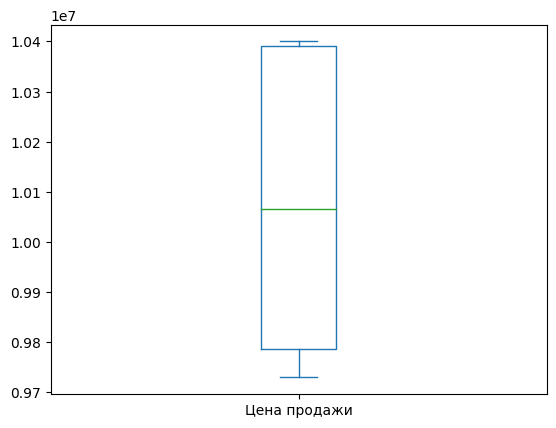

In [74]:
task_5['Цена продажи'].plot.box()

Цена продажи    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

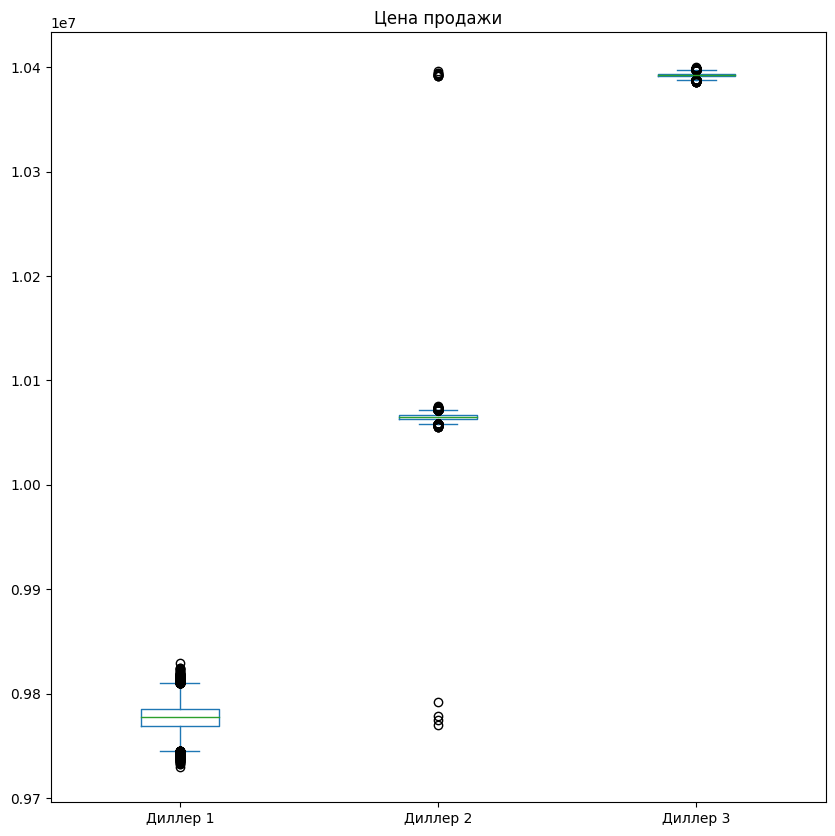

In [84]:
fig,ax = plt.subplots(figsize = (10,10))
task_5.plot.box(by = 'Диллер', ax=ax)


In [85]:
task_5 = pd.read_csv('Dop.Task_3.csv')
task_5.head(5)

,Диллер,Цена продажи,Коробка передач,Специальный пакет
0,Диллер 1,9.776203e+06,Гидротрансформатор,Безопасность
1,Диллер 1,9.780943e+06,Гидротрансформатор,Для плохих дорог
2,Диллер 1,9.750940e+06,Гидротрансформатор,Зимний
3,Диллер 1,9.794827e+06,Робот,Зимний
4,Диллер 1,9.774810e+06,Гидротрансформатор,Зимний


In [115]:
gear_by_dealer = task_5.groupby(by=['Диллер', 'Коробка передач']
                                ).count().reset_index().rename({'Специальный пакет': 'count'}, axis = 1).sort_values(by='count')
gear_by_dealer

,Диллер,Коробка передач,Цена продажи,count
1,Диллер 1,Механика,9148,9148
4,Диллер 2,Механика,9316,9316
7,Диллер 3,Механика,9344,9344
5,Диллер 2,Робот,18320,18320
8,Диллер 3,Робот,18349,18349
2,Диллер 1,Робот,18417,18417
6,Диллер 3,Гидротрансформатор,18471,18471
3,Диллер 2,Гидротрансформатор,18554,18554
0,Диллер 1,Гидротрансформатор,18606,18606


<AxesSubplot: xlabel='Диллер', ylabel='count'>

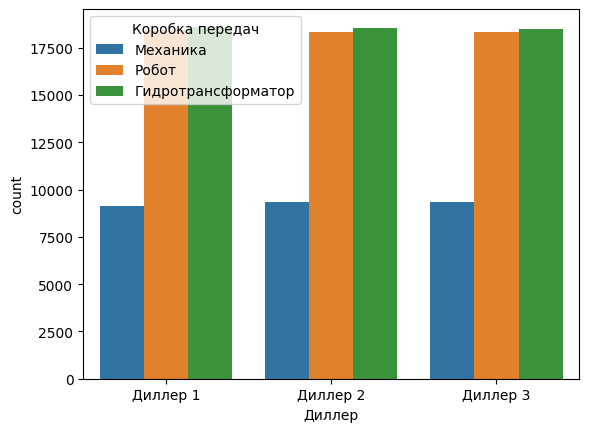

In [116]:
sns.barplot(data = gear_by_dealer, y = 'count', x = 'Диллер', hue = 'Коробка передач') 

In [122]:
specpac_by_dealer = task_5.groupby(by=['Диллер', 'Специальный пакет']
                                ).count().reset_index().rename({'Коробка передач': 'count'}, axis = 1).sort_values(by=['Диллер', 'count'])
specpac_by_dealer

,Диллер,Специальный пакет,Цена продажи,count
1,Диллер 1,Для плохих дорог,4676,4676
0,Диллер 1,Безопасность,13922,13922
2,Диллер 1,Зимний,27573,27573
4,Диллер 2,Для плохих дорог,4697,4697
3,Диллер 2,Безопасность,13914,13914
5,Диллер 2,Зимний,27579,27579
7,Диллер 3,Для плохих дорог,4430,4430
6,Диллер 3,Безопасность,13943,13943
8,Диллер 3,Зимний,27791,27791


<AxesSubplot: xlabel='Диллер', ylabel='count'>

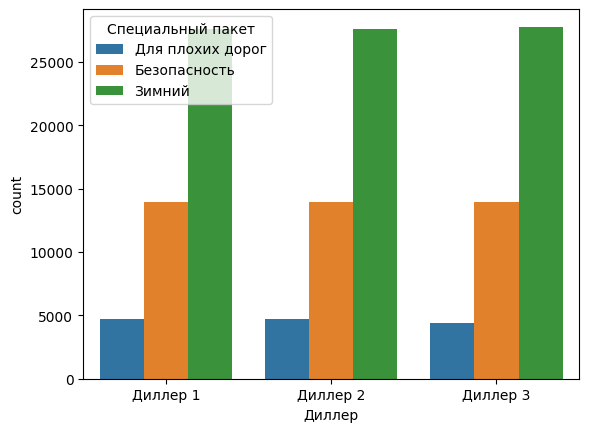

In [123]:
sns.barplot(data = specpac_by_dealer, y = 'count', x = 'Диллер', hue = 'Специальный пакет') 

Задача 5